# Objetivo:

- Prever a coluna cliente

Métrica: F1-score


Neste desafio separei os dados de treino, em treino e teste e validação.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train = pd.read_csv('/content/drive/MyDrive/comp_FLAI/treino.csv')
submission = pd.read_csv('/content/drive/MyDrive/comp_FLAI/teste.csv')

train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente
0,Female,0,No,No,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,Normal
1,Female,0,Yes,Yes,59,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,Premium
2,Female,0,Yes,Yes,68,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),Premium
3,Female,0,No,Yes,35,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,Premium
4,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,Normal


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            2500 non-null   object
 1   SeniorCitizen     2500 non-null   int64 
 2   Partner           2500 non-null   object
 3   Dependents        2500 non-null   object
 4   tenure            2500 non-null   int64 
 5   PhoneService      2500 non-null   object
 6   MultipleLines     2500 non-null   object
 7   InternetService   2500 non-null   object
 8   OnlineSecurity    2500 non-null   object
 9   OnlineBackup      2500 non-null   object
 10  DeviceProtection  2500 non-null   object
 11  TechSupport       2500 non-null   object
 12  StreamingTV       2500 non-null   object
 13  StreamingMovies   2500 non-null   object
 14  Contract          2500 non-null   object
 15  PaperlessBilling  2500 non-null   object
 16  PaymentMethod     2500 non-null   object
 17  Cliente       

# Pré-processamento dos dados

Aqui transformei as colunas categóricas em colunas numéricas.

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()


transform = train.dtypes[train.dtypes == 'object'].keys()
for col in transform:
    if col !="Cliente":
      train[col] = encoder.fit_transform(list(train[col].values.astype('str')))
    


dic_cliente = {'Normal':0,'Premium':1}
train['ClienteId']=train['Cliente'].map(dic_cliente)

train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente,ClienteId
0,0,0,0,0,20,1,0,2,1,1,1,1,1,1,2,0,3,Normal,0
1,0,0,1,1,59,1,2,0,2,2,0,2,0,0,1,0,3,Premium,1
2,0,0,1,1,68,0,1,0,0,2,2,2,2,2,2,0,1,Premium,1
3,0,0,0,1,35,1,2,0,0,0,0,0,0,0,0,0,3,Premium,1
4,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,Normal,0


# Machine Learning


Separar o dataset "train" em dados de treino, teste e validação.


O dataset dados_ml foi para treinar e avaliar o modelo, e no dataset validação irei utilzar o modelo escolhido para fazer as predições ates de realizar a submissão

In [6]:
dados_ml = train.iloc[:1999]
dados_validacao=train.iloc[2000:]

In [7]:
from sklearn.metrics import  roc_auc_score,roc_curve, classification_report,confusion_matrix,f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold

In [8]:
X=dados_ml.drop(columns=['Cliente','ClienteId'],axis=1)
y=dados_ml['ClienteId']

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,y,shuffle=True,test_size=0.5,random_state=42)

# Benchmark

In [9]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_treino, Y_treino)
y_pred = dummy_clf.predict(X_teste)
acuracia = dummy_clf.score(X_teste, Y_teste) * 100

print('A acurácia do dummy mostfrequent foi %.2f%%' % acuracia)

A acurácia do dummy mostfrequent foi 52.60%


# Testando outros modelos

In [10]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



from sklearn.model_selection import cross_val_score,KFold

lista_classificacores = [ LogisticRegression(),
                         GaussianNB(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier(),
                         XGBClassifier()]


for clf in lista_classificacores:
  print(clf.__class__.__name__)
  cv=KFold(n_splits=10, random_state=0, shuffle=True)
  clf.fit(X_treino, Y_treino)
  train_acc = clf.score(X_treino, Y_treino)
  val_score = cross_val_score(clf, X_treino, Y_treino, cv=cv)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Validation score', val_score.mean())
  print('Teste:', test_acc)

  print('F1 Score')

  y_pred_treino = clf.predict(X_treino)
  f1_treino = f1_score(Y_treino, y_pred_treino)
  print('Treino', f1_treino)

  y_pred_teste = clf.predict(X_teste)
  f1_teste = f1_score(Y_teste,y_pred_teste)
  print('Test', f1_teste)
  print('='*80)

LogisticRegression
Treino: 0.9059059059059059
Validation score 0.8948787878787879
Teste: 0.899
F1 Score
Treino 0.8896713615023473
Test 0.8910463861920173
GaussianNB
Treino: 0.8958958958958959
Validation score 0.89089898989899
Teste: 0.897
F1 Score
Treino 0.8767772511848341
Test 0.8884073672806065
DecisionTreeClassifier
Treino: 1.0
Validation score 0.9719696969696969
Teste: 0.957
F1 Score
Treino 1.0
Test 0.9544973544973545
RandomForestClassifier
Treino: 1.0
Validation score 0.9759696969696968
Teste: 0.966
F1 Score
Treino 1.0
Test 0.9639830508474577
XGBClassifier
Treino: 1.0
Validation score 0.977959595959596
Teste: 0.975
F1 Score
Treino 1.0
Test 0.9735449735449736


# Ajustando o XGBClassifier

In [11]:
import xgboost as xgb

In [26]:
kf = KFold(n_splits=10,random_state=0,shuffle=True)

X=dados_ml.drop(columns=['Cliente','ClienteId'],axis=1)
y=dados_ml['ClienteId']



# f1_lista=[]
for i,(tr,ts) in enumerate(kf.split(X)):
    Xtr, ytr = X.iloc[tr], y.iloc[tr]
    Xval, yval = X.iloc[ts], y.iloc[ts]
    
    clf = xgb.XGBClassifier(seed=42)
    clf.fit(Xtr,ytr)
    
    y_pred=clf.predict(Xval)

    # f1_score = f1_score(yval,y_pred)
    # f1_lista.append(f1_score)
    print('Fold: {}'.format(i))
    print('-'*60)
    print(classification_report(yval, y_pred))
    print('='*60)
     


Fold: 0
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        92
           1       0.99      0.97      0.98       108

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

Fold: 1
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       0.98      0.97      0.97        98

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

Fold: 2
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       113
           1       0.99      0

A acurácia do XGBCLassifier foi 98.99%


Text(33.0, 0.5, 'Real ( 1 ou 0)')

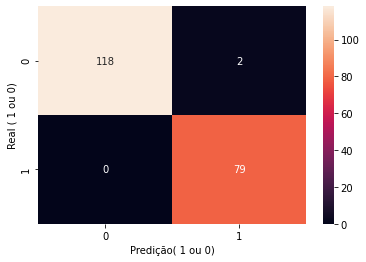

In [13]:
cm=confusion_matrix(yval, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
y_pred = clf.predict(Xval)
acuracia = clf.score(Xval, yval) * 100

print('A acurácia do XGBCLassifier foi %.2f%%' % acuracia)

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

# Fazendo predições para os dados de validação

Neste tópico ajustei o modelo aos dados já treinados anteriormente(dados_ml) e fiz predições para os dados_validacao.

In [14]:
dados_validacao.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente,ClienteId
2000,0,0,1,0,72,1,2,1,0,2,2,2,2,2,1,0,1,Premium,1
2001,1,0,1,1,4,1,0,0,0,0,0,2,0,2,0,0,1,Normal,0
2002,1,0,1,0,2,1,2,1,0,0,2,0,2,0,0,1,2,Normal,0
2003,1,0,1,1,55,1,0,2,1,1,1,1,1,1,1,0,3,Normal,0
2004,1,0,1,0,31,1,2,1,2,2,0,2,0,0,0,1,1,Premium,1


In [15]:
X_val=dados_validacao.drop(columns=['Cliente','ClienteId'],axis=1)
y_val=dados_validacao['ClienteId']

In [16]:
kf = KFold(n_splits=10,random_state=0,shuffle=True)

X=dados_ml.drop(columns=['Cliente','ClienteId'],axis=1)
y=dados_ml['ClienteId']

clf.fit(X,y)
    
y_pred_validacao=clf.predict(X_val)


print(classification_report(y_val, y_pred_validacao))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       228
           1       0.99      0.96      0.98       272

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



# Submission

Predições para os dados de teste.

Neste tópco foi ecesssário um pequeno pré-processamento dos dados para realizar as predições.

In [17]:
submission.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,Yes,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
2,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
3,Female,0,No,No,48,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
4,Male,0,Yes,No,71,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check


In [18]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            2500 non-null   object
 1   SeniorCitizen     2500 non-null   int64 
 2   Partner           2500 non-null   object
 3   Dependents        2500 non-null   object
 4   tenure            2500 non-null   int64 
 5   PhoneService      2500 non-null   object
 6   MultipleLines     2500 non-null   object
 7   InternetService   2500 non-null   object
 8   OnlineSecurity    2500 non-null   object
 9   OnlineBackup      2500 non-null   object
 10  DeviceProtection  2500 non-null   object
 11  TechSupport       2500 non-null   object
 12  StreamingTV       2500 non-null   object
 13  StreamingMovies   2500 non-null   object
 14  Contract          2500 non-null   object
 15  PaperlessBilling  2500 non-null   object
 16  PaymentMethod     2500 non-null   object
dtypes: int64(2), o

In [19]:
transform_2 = submission.dtypes[submission.dtypes == 'object'].keys()
for col in transform_2:
  submission[col] = encoder.fit_transform(list(submission[col].values.astype('str')))
    

submission.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,1,23,1,0,2,1,1,1,1,1,1,1,0,3
1,0,0,0,0,27,1,0,0,2,2,0,0,0,0,0,1,3
2,1,0,0,0,2,1,0,2,1,1,1,1,1,1,0,0,3
3,0,0,0,0,48,1,0,1,2,0,2,2,2,2,2,1,1
4,1,0,1,0,71,1,0,1,0,2,2,2,2,2,2,1,2


In [20]:
previsao=clf.predict(submission)

subm = pd.DataFrame()
subm['Cliente'] = previsao
subm.to_csv('submissão_robert_ferro_01.csv', index = False)